In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Instalar librerías si no están disponibles
import subprocess
import sys

def instalar_si_necesario(libreria):
    try:
        __import__(libreria)
        print(f"✅ {libreria} ya está disponible")
    except ImportError:
        print(f"🔄 Instalando {libreria}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", libreria])
        print(f"✅ {libreria} instalado correctamente")

# Verificar e instalar librerías necesarias
instalar_si_necesario('yfinance')
instalar_si_necesario('matplotlib')
instalar_si_necesario('statsmodels')
instalar_si_necesario('numpy')

# Importar todo
import yfinance as yf
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

warnings.filterwarnings("ignore")
print("🎉 Todas las librerías importadas correctamente!")

✅ yfinance ya está disponible
✅ matplotlib ya está disponible
✅ statsmodels ya está disponible
✅ numpy ya está disponible
🎉 Todas las librerías importadas correctamente!


In [3]:
apple = yf.download(tickers="AAPL",period="2y", interval="1mo", rounding=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
apple

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-09-01,169.55,188.14,165.99,187.65,1337823000
2023-10-01,169.11,180.57,164.06,169.56,1172816900
2023-11-01,188.11,191.06,168.47,169.34,1099651600
2023-12-01,190.91,197.94,185.88,188.73,1063181200
2024-01-01,182.85,194.73,178.66,185.58,1187490800
2024-02-01,179.23,189.45,177.75,182.45,1161553500
2024-03-01,170.26,179.24,167.29,178.27,1433151800
2024-04-01,169.12,177.09,162.91,169.97,1246144100


In [5]:
# Solución simple: mantener los datos originales y usar copy() para visualización limpia
apple = yf.download(tickers="AAPL", period="2y", interval="1mo", rounding=True)

[*********************100%***********************]  1 of 1 completed


In [6]:
# Función para mostrar DataFrame con fechas limpias
def mostrar_fecha_limpia(df):
    """Función que siempre muestra el DataFrame con fechas en formato YYYY-MM-DD"""
    df_display = df.copy()
    if hasattr(df_display.index, 'strftime'):
        df_display.index = df_display.index.strftime('%Y-%m-%d')
    return df_display

# Ahora siempre puedes usar esta función para ver fechas limpias
mostrar_fecha_limpia(apple)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-09-01,169.55,188.14,165.99,187.65,1337823000
2023-10-01,169.11,180.57,164.06,169.56,1172816900
2023-11-01,188.11,191.06,168.47,169.34,1099651600
2023-12-01,190.91,197.94,185.88,188.73,1063181200
2024-01-01,182.85,194.73,178.66,185.58,1187490800
2024-02-01,179.23,189.45,177.75,182.45,1161553500
2024-03-01,170.26,179.24,167.29,178.27,1433151800
2024-04-01,169.12,177.09,162.91,169.97,1246144100


In [7]:
apple = apple['Close']
apple

Ticker,AAPL
Date,
2023-09-01,169.55
2023-10-01,169.11
2023-11-01,188.11
2023-12-01,190.91
2024-01-01,182.85
2024-02-01,179.23
2024-03-01,170.26
2024-04-01,169.12
2024-05-01,190.88


In [8]:
apple.index = pd.to_datetime(apple.index, format='%Y-%m-%d')
apple2024 = apple[apple.index.year == 2024]

<Axes: xlabel='Date'>

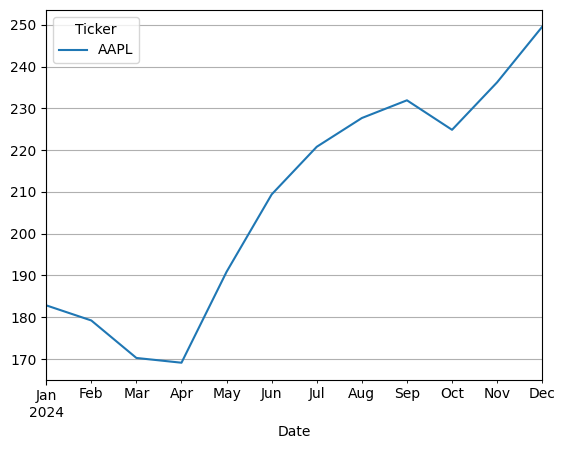

In [9]:
apple2024.plot(grid=True)

In [10]:
rendimientos = apple.pct_change()
rendimientos

Ticker,AAPL
Date,
2023-09-01,NaN
2023-10-01,-0.002595
2023-11-01,0.112353
2023-12-01,0.014885
2024-01-01,-0.042219
2024-02-01,-0.019798
2024-03-01,-0.050047
2024-04-01,-0.006696
2024-05-01,0.128666


In [11]:
apple_microsoft = yf.download(tickers="AAPL MSFT", period="2y", interval="1mo", rounding=True)
apple_microsoft

[*********************100%***********************]  2 of 2 completed


Price        Close            High             Low            Open          \
Ticker        AAPL    MSFT    AAPL    MSFT    AAPL    MSFT    AAPL    MSFT   
Date                                                                         
2023-09-01  169.55  311.57  188.14  336.35  165.99  305.36  187.65  326.93   
2023-10-01  169.11  333.64  180.57  341.62  164.06  307.09  169.56  312.10   
2023-11-01  188.11  373.90  191.06  379.22  168.47  335.16  169.34  335.30   
2023-12-01  190.91  371.82  197.94  373.92  185.88  358.83  188.73  372.53   
2024-01-01  182.85  393.12  194.73  410.66  178.66  362.39  185.58  369.66   
2024-02-01  179.23  409.00  189.45  416.10  177.75  392.76  182.45  397.32   
2024-03-01  170.26  416.77  179.24  426.77  167.29  394.65  178.27  407.41   
2024-04-01  169.12  385.67  177.09  425.34  162.91  384.38  169.97  419.97   
2024-05-01  190.88  411.23  191.62  429.53  167.90  386.64  168.37  388.92   
2024-06-01  209.40  443.55  218.93  452.70  191.04  405.81  191.78  412.37   
2024-07-01  220.80  415.17  235.86  464.79  210.69  409.07  210.86  445.25   
2024-08-01  227.68  413.97  231.57  424.21  194.87  382.65  223.07  417.59   
2024-09-01  231.92  427.80  232.01  439.28  212.93  398.47  227.49  415.48   
2024-10-01  224.86  403.99  236.39  435.95  220.30  403.94  228.46  425.96   
2024-11-01  236.23  421.00  236.71  426.83  218.69  403.21  219.95  406.63   
2024-12-01  249.53  419.89  259.18  454.41  236.32  419.05  236.43  419.96   
2025-01-01  235.17  413.47  248.22  446.66  218.60  409.15  248.05  423.90   
2025-02-01  240.98  395.47  249.12  417.70  224.90  385.09  229.18  410.02   
2025-03-01  221.59  374.70  243.43  401.41  207.91  366.57  241.20  398.09   
2025-04-01  211.98  394.54  224.64  395.93  168.80  344.16  219.27  373.96   
2025-05-01  200.36  459.52  214.04  461.67  192.78  424.12  208.57  430.32   
2025-06-01  204.94  497.41  207.15  500.76  194.85  456.89  200.05  457.14   
2025-07-01  207.33  533.50  215.98  555.45  205.91  488.70  206.44  496.47   
2025-08-01  224.90  504.24  235.12  538.25  201.50  502.72  210.87  535.00   

Price           Volume             
Ticker            AAPL       MSFT  
Date                               
2023-09-01  1337823000  416742300  
2023-10-01  1172816900  540950200  
2023-11-01  1099651600  563894000  
2023-12-01  1063181200  522081700  
2024-01-01  1187490800  528491200  
2024-02-01  1161553500  444091200  
2024-03-01  1433151800  426445300  
2024-04-01  1246144100  441083800  
2024-05-01  1336511300  413780000  
2024-06-01  1717952100  341717100  
2024-07-01  1153099800  440449200  
2024-08-01  1122667000  451919000  
2024-09-01  1232097700  376898100  
2024-10-01   930736000  440745500  
2024-11-01   891588300  442306200  
2024-12-01   977916100  439902400  
2025-01-01  1200176400  462501200  
2025-02-01   862272300  432448900  
2025-03-01  1115239500  491786600  
2025-04-01  1607318600  563144100  
2025-05-01  1195728200  476942400  
2025-06-01  1100409300  401255100  
2025-07-01  1079935600  396881900  
2025-08-01  1011652868  339974295

In [12]:
apple_microsoft = apple_microsoft['Close']
apple_microsoft

Ticker,AAPL,MSFT
Date,,
2023-09-01,169.55,311.57
2023-10-01,169.11,333.64
2023-11-01,188.11,373.90
2023-12-01,190.91,371.82
2024-01-01,182.85,393.12
2024-02-01,179.23,409.00
2024-03-01,170.26,416.77
2024-04-01,169.12,385.67
2024-05-01,190.88,411.23


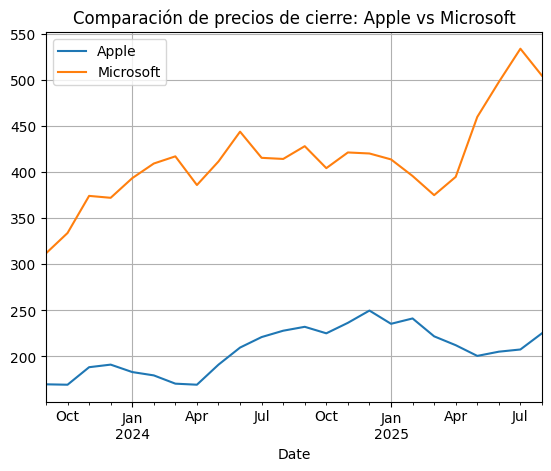

In [13]:
apple_microsoft['AAPL'].plot(grid=True, label='Apple')
apple_microsoft['MSFT'].plot(grid=True, label='Microsoft')
plt.legend()
plt.title('Comparación de precios de cierre: Apple vs Microsoft')
plt.show()

In [14]:
rend_apple_micro = apple_microsoft.pct_change()
rend_apple_micro

Ticker,AAPL,MSFT
Date,,
2023-09-01,NaN,NaN
2023-10-01,-0.002595,0.070835
2023-11-01,0.112353,0.120669
2023-12-01,0.014885,-0.005563
2024-01-01,-0.042219,0.057286
2024-02-01,-0.019798,0.040395
2024-03-01,-0.050047,0.018998
2024-04-01,-0.006696,-0.074621
2024-05-01,0.128666,0.066274


In [15]:
rend_apple_micro.dropna(inplace=True)
rend_apple_micro

Ticker,AAPL,MSFT
Date,,
2023-10-01,-0.002595,0.070835
2023-11-01,0.112353,0.120669
2023-12-01,0.014885,-0.005563
2024-01-01,-0.042219,0.057286
2024-02-01,-0.019798,0.040395
2024-03-01,-0.050047,0.018998
2024-04-01,-0.006696,-0.074621
2024-05-01,0.128666,0.066274
2024-06-01,0.097024,0.078593


In [16]:
corr = rend_apple_micro['AAPL'].corr(rend_apple_micro['MSFT'])
print('Correlacion entre Apple y Microsoft:', corr)

Correlacion entre Apple y Microsoft: 0.12304671224428176


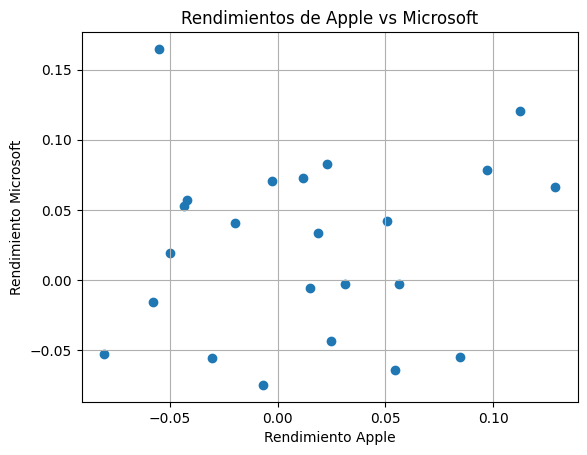

In [17]:
plt.scatter(rend_apple_micro['AAPL'], rend_apple_micro['MSFT'])
plt.title('Rendimientos de Apple vs Microsoft')
plt.xlabel('Rendimiento Apple')
plt.ylabel('Rendimiento Microsoft')
plt.grid()
plt.show()

In [18]:
import statsmodels.api as sm
rend_apple_micro = sm.add_constant(rend_apple_micro)
rend_apple_micro

,const,AAPL,MSFT
Date,,,
2023-10-01,1.0,-0.002595,0.070835
2023-11-01,1.0,0.112353,0.120669
2023-12-01,1.0,0.014885,-0.005563
2024-01-01,1.0,-0.042219,0.057286
2024-02-01,1.0,-0.019798,0.040395
2024-03-01,1.0,-0.050047,0.018998
2024-04-01,1.0,-0.006696,-0.074621
2024-05-01,1.0,0.128666,0.066274
2024-06-01,1.0,0.097024,0.078593


In [19]:
regresion = sm.OLS(rend_apple_micro['AAPL'], rend_apple_micro[['const', 'MSFT']]).fit()
regresion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.3228
Date:                Thu, 21 Aug 2025   Prob (F-statistic):              0.576
Time:                        20:46:23   Log-Likelihood:                 33.673
No. Observations:                  23   AIC:                            -63.35
Df Residuals:                      21   BIC:                            -61.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0113      0.013      0.871      0.394      -0.016       0.038
MSFT           0.1117      0.197      0.568      0.576      -0.297       0.520
==============================================================================
Omnibus:                        1.503   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.472   Jarque-Bera (JB):                1.040
Skew:                           0.221   Prob(JB):                        0.594
Kurtosis:                       2.057   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# calculo del indice de autocorrelacion
# apple es una Serie (Close), no necesita ['AAPL']
autocorrelacion = apple['AAPL'].autocorr
autocorrelacion

<bound method Series.autocorr of Date
2023-09-01    169.55
2023-10-01    169.11
2023-11-01    188.11
2023-12-01    190.91
2024-01-01    182.85
2024-02-01    179.23
2024-03-01    170.26
2024-04-01    169.12
2024-05-01    190.88
2024-06-01    209.40
2024-07-01    220.80
2024-08-01    227.68
2024-09-01    231.92
2024-10-01    224.86
2024-11-01    236.23
2024-12-01    249.53
2025-01-01    235.17
2025-02-01    240.98
2025-03-01    221.59
2025-04-01    211.98
2025-05-01    200.36
2025-06-01    204.94
2025-07-01    207.33
2025-08-01    224.90
Name: AAPL, dtype: float64>

In [21]:
# Periodos 1d, 5d, 1m, 3m, 6m, 1y, 2y, 5y, 10y, max
# Intervalos 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1d, 1wk, 1mo, 3mo

apple = yf.download(tickers="AAPL", period="2y", interval="1d", rounding=True)
apple = apple['Close']
apple

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2023-08-22,175.51
2023-08-23,179.36
2023-08-24,174.67
2023-08-25,176.88
2023-08-28,178.44
...,...
2025-08-15,231.59
2025-08-18,230.89
2025-08-19,230.56


In [22]:
# Calcular autocorrelación (apple debe ser una Serie)
# Si apple es DataFrame, tomamos la columna Close
if isinstance(apple, pd.DataFrame):
    apple_serie = apple['Close'] if 'Close' in apple.columns else apple.iloc[:, 0]
else:
    apple_serie = apple

autocorrelacion = apple_serie.autocorr()
print(f"Autocorrelación: {autocorrelacion}")

Autocorrelación: 0.988966283631348


In [23]:
# Usar la Serie apple_close para calcular diferencias
apple_dif = apple.diff()
print(f"Tipo de apple_dif: {type(apple_dif)}")
apple_dif

Tipo de apple_dif: <class 'pandas.core.frame.DataFrame'>


Ticker,AAPL
Date,
2023-08-22,NaN
2023-08-23,3.85
2023-08-24,-4.69
2023-08-25,2.21
2023-08-28,1.56
...,...
2025-08-15,-1.19
2025-08-18,-0.70
2025-08-19,-0.33


In [24]:
# Crear explícitamente una Serie para autocorrelación
# Si apple_dif es DataFrame, convertir a Serie
if isinstance(apple_dif, pd.DataFrame):
    apple_dif_serie = apple_dif['Close'] if 'Close' in apple_dif.columns else apple_dif.iloc[:, 0]
else:
    apple_dif_serie = apple_dif

autocorrelacion_dif = apple_dif_serie.autocorr()
autocorrelacion_dif

np.float64(0.06338833844807037)

In [25]:
# Generacion de la funcion de autocorrelacion
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [26]:
acf_array = acf(apple)
print(f"Array de autocorrelación: {acf_array}")

Array de autocorrelación: [1.         0.98675728 0.97242128 0.95504962 0.93955618 0.92535847
 0.9132627  0.90180373 0.89211784 0.8832285  0.87386392 0.86592209
 0.85789513 0.85087619 0.84276879 0.83509864 0.82595929 0.81876448
 0.81163872 0.80366265 0.79583398 0.78596609 0.77653964 0.76617756
 0.75611688 0.74662996 0.73814056 0.72864756]


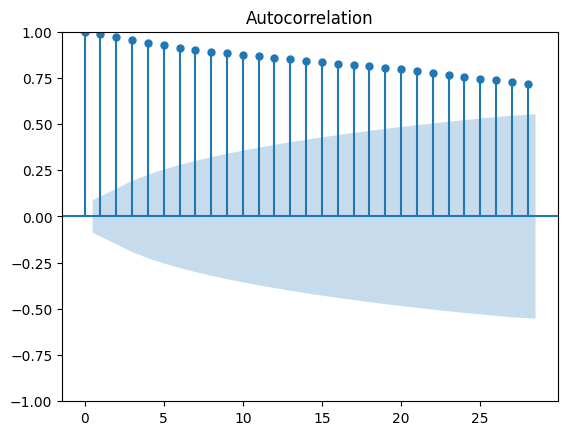

In [27]:
plot_acf(apple, alpha=0.05)
plt.show()

In [28]:
rendimientos = rendimientos.dropna()
acf_rendimientos = acf(rendimientos)
print(f"Array de autocorrelación de rendimientos: {acf_rendimientos}")

Array de autocorrelación de rendimientos: [ 1.          0.25362044  0.05724255 -0.17196619 -0.33382594 -0.24300134
  0.21017704  0.04053975 -0.12671897 -0.0864679  -0.27855912 -0.20167176
  0.12621605  0.2032034 ]


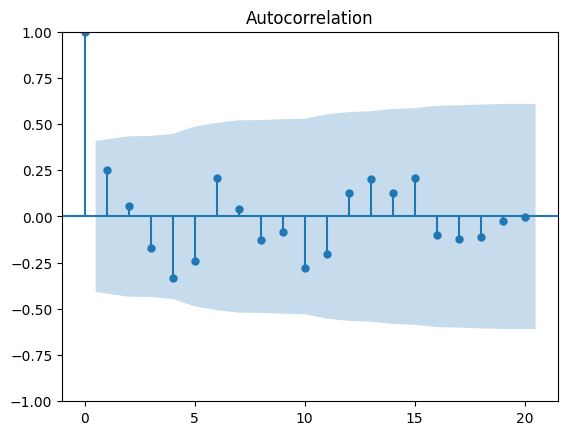

In [29]:
plot_acf(rendimientos, alpha=0.05, lags=20)
plt.show()

In [30]:
# prueba de caminata aleatoria
# H0: se tiene un proceso de caminata aleatoria
# H1: No se tiene un proceso de caminata aleatoria

from statsmodels.tsa.stattools import adfuller
import numpy as np

# Generacion de 500 pasos aleatorios
np.random.seed(1)
pasos = np.random.normal(loc=0.001, scale=0.01, size=500)+1

In [31]:
pasos[0]=1
P = 100 + np.cumprod(pasos)

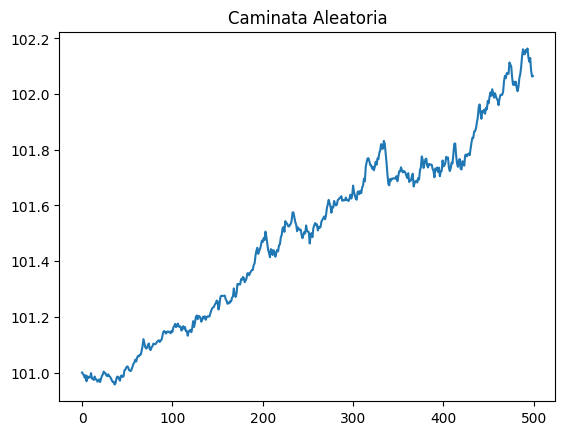

In [32]:
# Graficar

plt.plot(P)
plt.title('Caminata Aleatoria')
plt.show()

In [ ]:
resultado = adfuller(P)
print(f"El Valor de la prueba p es: {resultado[1]}")

El Valor de la prueba ADF es: 0.9404090932977585


In [34]:
# prueba Dickey-Fuller para los precios de Apple

resultado = adfuller(apple)
print(f"El Valor de la prueba ADF es: {resultado[1]}")

El Valor de la prueba ADF es: 0.33302215812948843


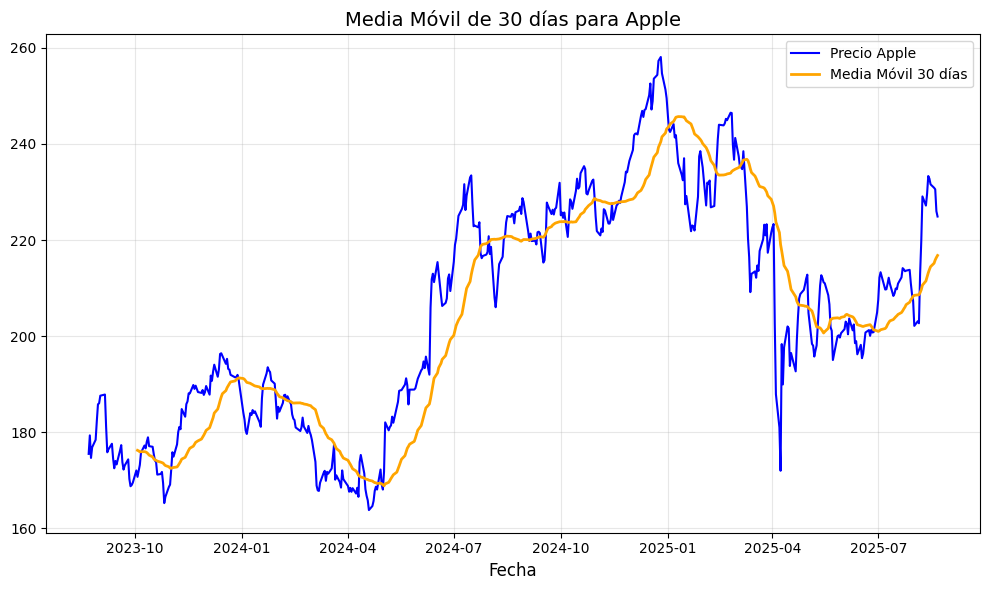

In [35]:
# Graficacion de la media movil para apple
rolling_apple = apple.rolling(30).mean()
plt.figure(figsize=(10, 6))
plt.plot(apple.index, apple.values, label='Precio Apple', color='blue', linewidth=1.5)
plt.plot(rolling_apple.index, rolling_apple.values, label='Media Móvil 30 días', color='orange', linewidth=2)
plt.title('Media Móvil de 30 días para Apple', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

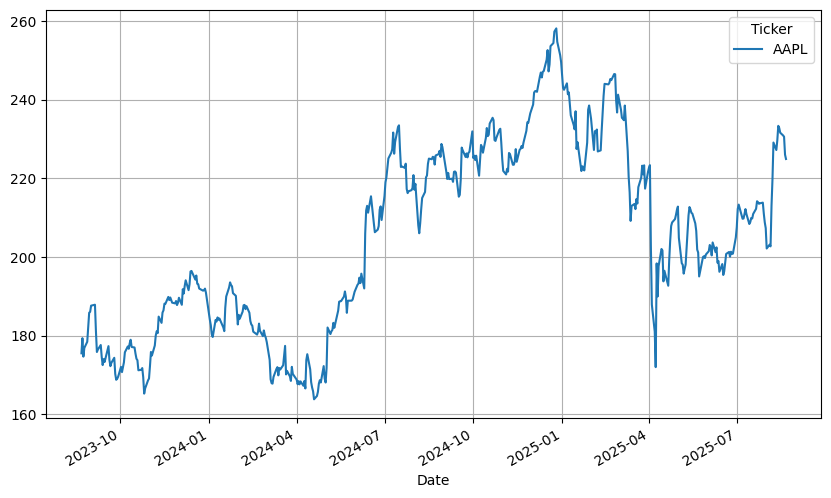

In [36]:
# descomposicion de la serie de tiempo

apple.plot(figsize=(10, 6)).grid()

In [37]:
apple = yf.download(tickers="AAPL", period="3y", interval="1d", rounding=True)
apple = apple['Close']
decom_apple = sm.tsa.seasonal_decompose(apple, model='additive', period=30)

[*********************100%***********************]  1 of 1 completed


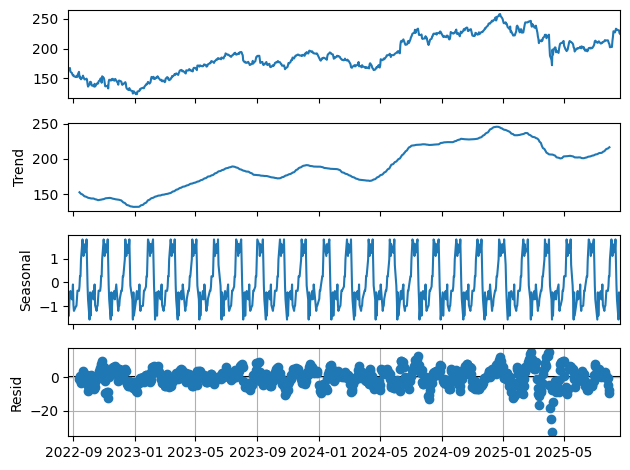

In [38]:
figure = decom_apple.plot()
plt.grid()
plt.show()

Prediccion simple mediante promedios moviles

In [39]:
apple.shape

(753, 1)

In [40]:
len_train = int(752 * 0.8)
len_train

601

In [41]:
train = apple[0:len_train]
test = apple[len_train:]

In [42]:
print (len(train))
print (len(test))

601
152


In [43]:
y_pred = apple.copy()
y_pred = pd.DataFrame(y_pred)

In [44]:
y_pred['pronostico'] = apple.rolling(30).mean()
print(y_pred.head(31))
print(f"Valores NaN: {y_pred['pronostico'].isna().sum()}")

Ticker        AAPL  pronostico
Date                          
2022-08-22  164.97         NaN
2022-08-23  164.63         NaN
2022-08-24  164.93         NaN
2022-08-25  167.39         NaN
2022-08-26  161.08         NaN
2022-08-29  158.87         NaN
2022-08-30  156.44         NaN
2022-08-31  154.78         NaN
2022-09-01  155.51         NaN
2022-09-02  153.39         NaN
2022-09-06  152.13         NaN
2022-09-07  153.54         NaN
2022-09-08  152.06         NaN
2022-09-09  154.92         NaN
2022-09-12  160.89         NaN
2022-09-13  151.45         NaN
2022-09-14  152.90         NaN
2022-09-15  150.00         NaN
2022-09-16  148.36         NaN
2022-09-19  152.08         NaN
2022-09-20  154.46         NaN
2022-09-21  151.33         NaN
2022-09-22  150.37         NaN
2022-09-23  148.09         NaN
2022-09-26  148.43         NaN
2022-09-27  149.40         NaN
2022-09-28  147.51         NaN
2022-09-29  140.27         NaN
2022-09-30  136.05         NaN
2022-10-03  140.24  153.215667
2022-10-

In [45]:
# Crear modelo de predicción usando media móvil de 30 días
y_pred_m = pd.DataFrame(index=apple.index)
y_pred_m['pronostico'] = np.nan

# Calcular predicciones usando media móvil de los últimos 30 días
for i in range(30, len(apple)):
    # Para cada punto, usar la media de los 30 días anteriores como predicción
    y_pred_m['pronostico'].iloc[i] = apple.iloc[i-30:i].mean()

print(f"Valores no nulos: {y_pred_m['pronostico'].count()}")
print(f"Valores NaN: {y_pred_m['pronostico'].isna().sum()}")
y_pred_m.head(40)  # Mostrar primeros 40 para ver el patrón

Valores no nulos: 723
Valores NaN: 30


,pronostico
Date,
2022-08-22,NaN
2022-08-23,NaN
2022-08-24,NaN
2022-08-25,NaN
2022-08-26,NaN
2022-08-29,NaN
2022-08-30,NaN
2022-08-31,NaN
2022-09-01,NaN


In [46]:
# Filtrar las predicciones para el período de test (desde len_train en adelante)
y_pred_m_test = y_pred_m['pronostico'][len_train:]
print(f"Período de test: desde índice {len_train}")
print(f"Fechas del test: desde {apple.index[len_train]} hasta {apple.index[-1]}")
y_pred_m_test

Período de test: desde índice 601
Fechas del test: desde 2025-01-14 00:00:00 hasta 2025-08-21 00:00:00


Date
2025-01-14    245.674333
2025-01-15    245.619333
2025-01-16    245.637333
2025-01-17    245.261000
2025-01-21    244.840333
                 ...    
2025-08-15    213.863333
2025-08-18    214.472667
2025-08-19    215.178667
2025-08-20    215.871667
2025-08-21    216.375333
Name: pronostico, Length: 152, dtype: float64

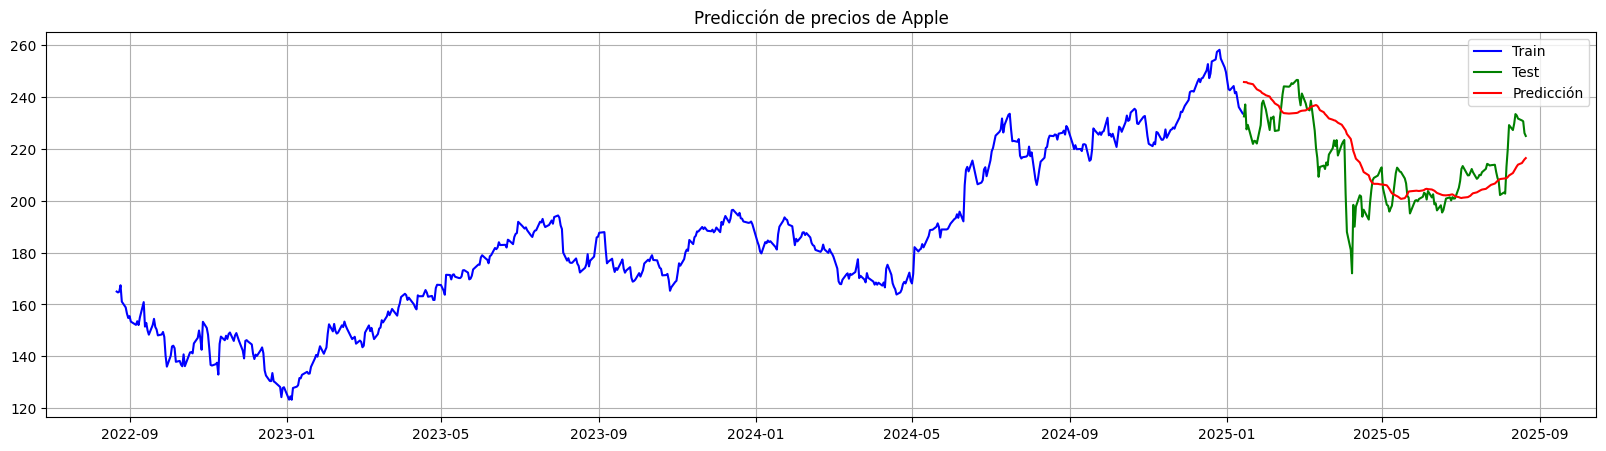

In [47]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Test', color='green')
plt.plot(y_pred_m_test, label='Predicción', color='red')
plt.title('Predicción de precios de Apple')
plt.legend(loc='best')
plt.show()

In [48]:
test = pd.DataFrame(test)
test

Ticker,AAPL
Date,
2025-01-14,232.45
2025-01-15,237.03
2025-01-16,227.45
2025-01-17,229.17
2025-01-21,221.85
...,...
2025-08-15,231.59
2025-08-18,230.89
2025-08-19,230.56


In [49]:
frames = [test, y_pred_m]
result = pd.concat(frames, axis=1, join='inner')
result.columns = ['Observado', 'Pronosticado']
result

,Observado,Pronosticado
Date,,
2025-01-14,232.45,245.674333
2025-01-15,237.03,245.619333
2025-01-16,227.45,245.637333
2025-01-17,229.17,245.261000
2025-01-21,221.85,244.840333
...,...,...
2025-08-15,231.59,213.863333
2025-08-18,230.89,214.472667
2025-08-19,230.56,215.178667


In [50]:
from sklearn.metrics import mean_squared_error

In [65]:
# 📊 CÁLCULO DE RMSE Y MAPE
from sklearn.metrics import mean_squared_error

# Asegurar que ambos sean Series o arrays 1D para el cálculo de métricas
if isinstance(test, pd.DataFrame):
    test_values = test.iloc[:, 0]
else:
    test_values = test

pred_values = y_pred_m_test

# Calcular RMSE y MAPE
rmse = np.sqrt(mean_squared_error(test_values, pred_values))
mape = np.mean(np.abs((test_values - pred_values) / test_values)) * 100

print("📈 MÉTRICAS DEL MODELO:")
print("=" * 30)
print(f"📊 RMSE: {rmse:.4f}")
print(f"📊 MAPE: {mape:.2f}%")
print("=" * 30)

📈 MÉTRICAS DEL MODELO:
📊 RMSE: 12.4279
📊 MAPE: 4.52%


In [66]:
# pronostico para el siguiente dia

y_pred.tail(1)['pronostico']

Date
2025-08-22    217.361
Name: pronostico, dtype: float64